# Day 21 - Creating Basic Plots in Python: Line, Bar, and Scatter


### Why Are Basic Plots Important?
Basic plots like line, bar, and scatter plots are the building blocks of data visualization. They provide a simple yet powerful way to understand your data at a glance. Whether you're comparing data over time, visualizing distributions, or identifying correlations, these plots are invaluable tools in your data science toolkit.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Line Plot
Line plots are ideal for visualizing data trends over time.


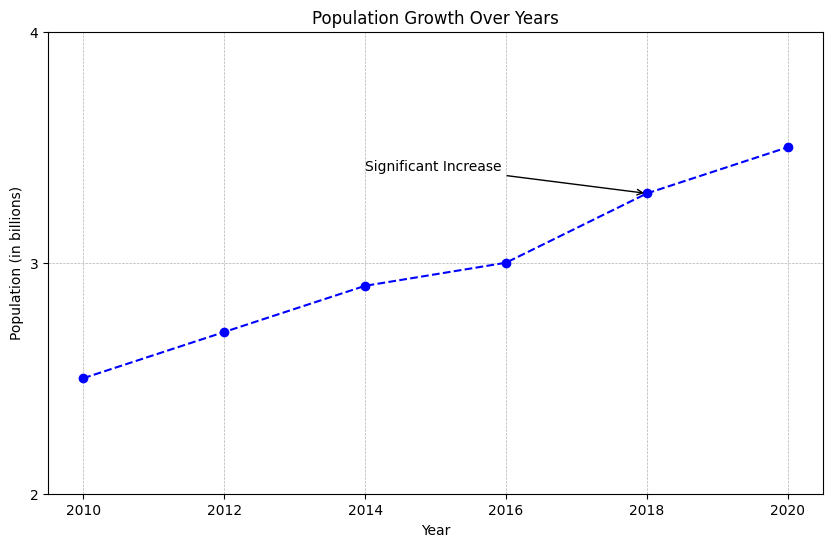

In [2]:
# Example data
data = {
    'Year': [2010, 2012, 2014, 2016, 2018, 2020],
    'Population': [2.5, 2.7, 2.9, 3.0, 3.3, 3.5]
}
df = pd.DataFrame(data)

# Creating a line plot
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Population'], marker='o', linestyle='--', color='b')
plt.title('Population Growth Over Years')
plt.xlabel('Year')
plt.ylabel('Population (in billions)')
plt.xticks(df['Year'])
plt.yticks(range(2, 5))
plt.grid(True, linestyle='--', linewidth=0.5)
plt.annotate('Significant Increase', xy=(2018, 3.3), xytext=(2014, 3.4),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()

## Bar Plot
Bar plots are useful for comparing quantities among different groups.


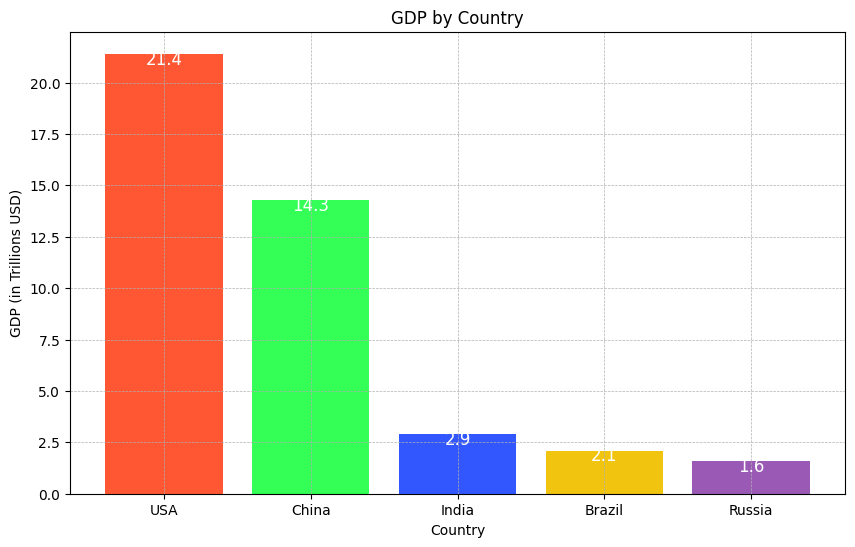

In [3]:
# Example data
data = {
    'Country': ['USA', 'China', 'India', 'Brazil', 'Russia'],
    'GDP': [21.4, 14.3, 2.9, 2.1, 1.6]
}
df = pd.DataFrame(data)

# Creating a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Country'], df['GDP'], color=['#FF5733', '#33FF57', '#3357FF', '#F1C40F', '#9B59B6'])
plt.title('GDP by Country')
plt.xlabel('Country')
plt.ylabel('GDP (in Trillions USD)')
plt.grid(True, linestyle='--', linewidth=0.5)

# Adding value labels on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, f'{bar.get_height()}', ha='center', color='white', fontsize=12)

plt.show()

## Scatter Plot
Scatter plots are excellent for identifying relationships between two variables.


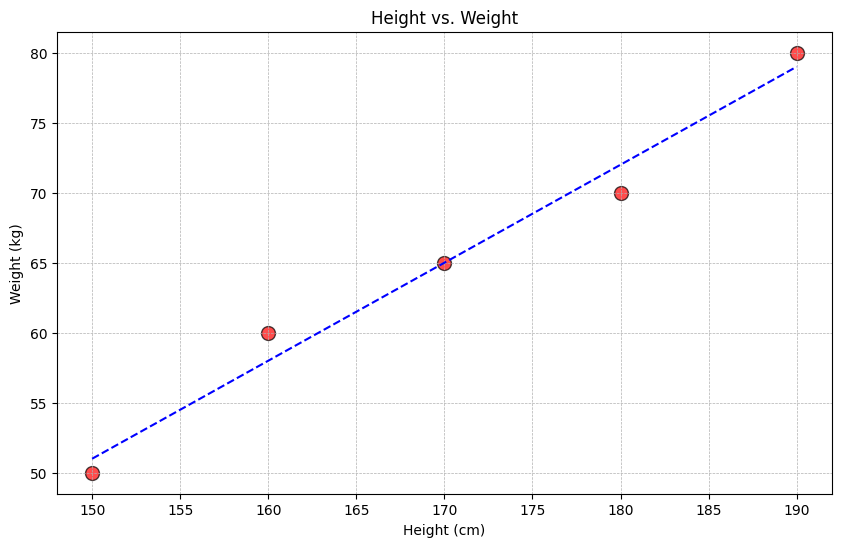

In [6]:
# Example data
data = {
    'Height': [150, 160, 170, 180, 190],
    'Weight': [50, 60, 65, 70, 80]
}
df = pd.DataFrame(data)

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Height'], df['Weight'], color='red', s=100, alpha=0.7, edgecolors='black')
plt.title('Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True, linestyle='--', linewidth=0.5)

# Adding regression line
m, b = np.polyfit(df['Height'], df['Weight'], 1)
plt.plot(df['Height'], m * df['Height'] + b, color='blue', linestyle='--')

plt.show()


## Use Case: Visualizing Population Data from a Public Dataset
For this use case, we'll use the `pandas-datareader` library to fetch population data from the World Bank. We'll visualize this data using line, bar, and scatter plots.

### Step 1: Install the Required Libraries
First, make sure you have the necessary libraries installed. You can install them using `pip`:


In [7]:
%pip install pandas-datareader matplotlib

In [11]:
import pandas_datareader.wb as wb

# Fetching the population data from the World Bank for the years 2000 to 2020
population_data = wb.download(
    indicator='SP.POP.TOTL',  # Total population indicator
    country=['US', 'CN', 'IN', 'BR', 'RU'],  # Countries: USA, China, India, Brazil, Russia
    start=2000,
    end=2020
)

# Reshaping the data
population_data = population_data.reset_index()
population_df = population_data.pivot(index='year', columns='country', values='SP.POP.TOTL')

# Display the first few rows of the dataset
display(population_df.head())

C:\Users\ricar\AppData\Local\Temp\ipykernel_34116\337977132.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  population_data = wb.download(


country,Brazil,China,India,Russian Federation,United States
year,,,,,
2000,175873720,1262645000,1059633675,146596869,282162411
2001,178211881,1271850000,1078970907,145976482,284968955
2002,180476685,1280400000,1098313039,145306497,287625193
2003,182629278,1288400000,1117415123,144648618,290107933
2004,184722043,1296075000,1136264583,144067316,292805298


### Step 3: Creating Visualizations
#### Line Plot: Visualizing Population Growth Over Time


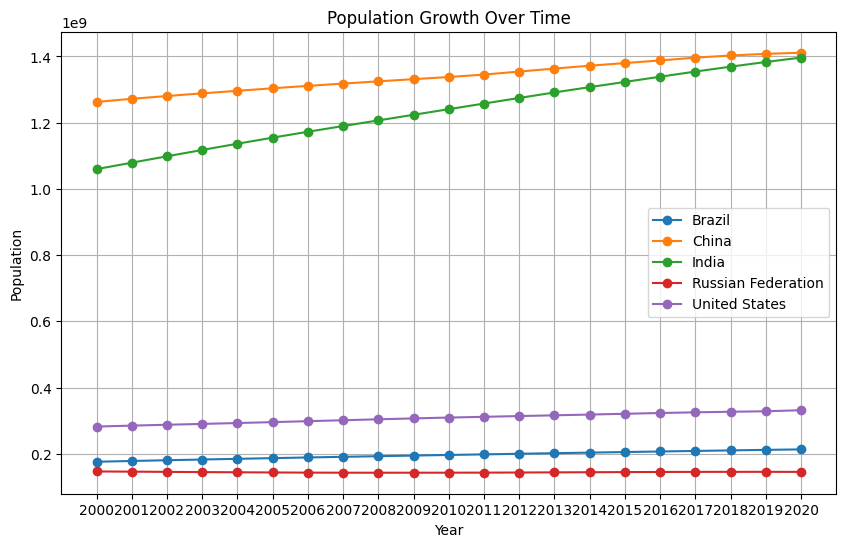

In [12]:
plt.figure(figsize=(10, 6))
for country in population_df.columns:
    plt.plot(population_df.index, population_df[country], marker='o', label=country)
plt.title('Population Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

#### Bar Plot: Comparing Population by Country for a Specific Year (e.g., 2020)


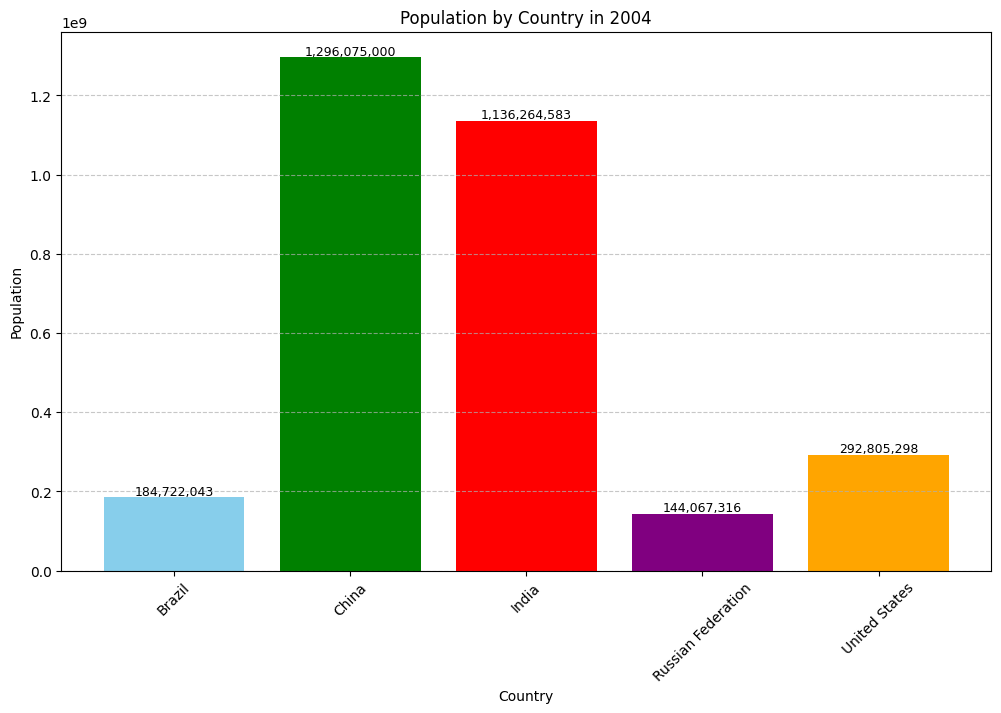

In [27]:
population_df.index = population_df.index.astype(int)

population_2004 = population_df.loc[2004]

# Creating a bar plot to compare populations in 2004
plt.figure(figsize=(12, 7))
plt.bar(population_2004.index, population_2004.values, color=['skyblue', 'green', 'red', 'purple', 'orange'])
plt.title('Population by Country in 2004')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels for each bar for better readability
for i, value in enumerate(population_2004.values):
    plt.text(i, value + 5000000, f'{value:,}', ha='center', fontsize=9)

plt.show()

#### Scatter Plot: Population vs. GDP


C:\Users\ricar\AppData\Local\Temp\ipykernel_34116\3474603378.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(population_2020[i], gdp_df[i], country, fontsize=12)


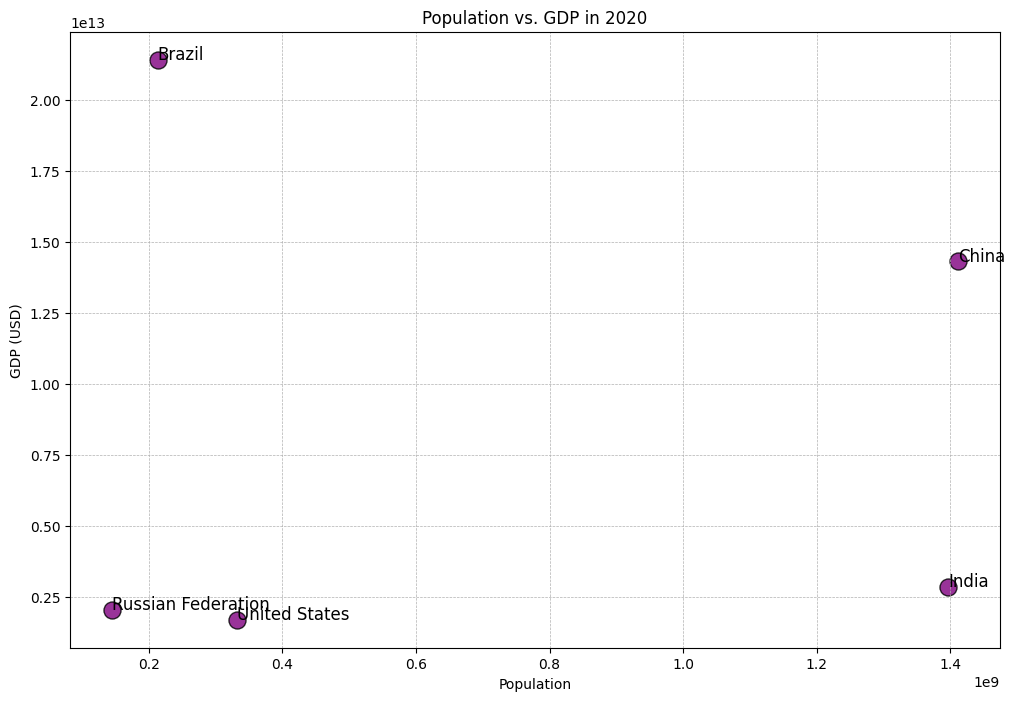

In [30]:
population_2020 = population_df.loc[2020]
# Simulate GDP data
gdp_data = {
    'US': 21.43e12,
    'CN': 14.34e12,
    'IN': 2.87e12,
    'BR': 2.05e12,
    'RU': 1.7e12
}
gdp_df = pd.Series(gdp_data, name='GDP')

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(population_2020, gdp_df, color='purple', s=150, alpha=0.8, edgecolors='black')
plt.title('Population vs. GDP in 2020')
plt.xlabel('Population')
plt.ylabel('GDP (USD)')

# Adding annotations
for i, country in enumerate(population_2020.index):
    plt.text(population_2020[i], gdp_df[i], country, fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()
